In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [22]:
measurement_columns = measurement.__table__.columns.keys()
measurement_columns

['id', 'station', 'date', 'prcp', 'tobs']

In [24]:
station_columns = station.__table__.columns.keys()
station_columns 

['id', 'station', 'name', 'latitude', 'longitude', 'elevation']

In [20]:
# Find the most recent date in the data set.
most_recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()[0]
most_recent_date

'2017-08-23'

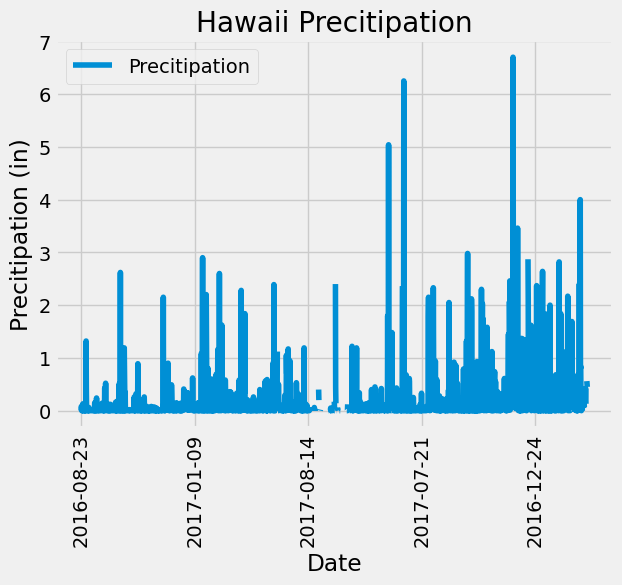

In [34]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
last_year = dt.date(2017,8,23)- dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement.date,measurement.prcp).filter(measurement.date >= last_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results, columns = ['date', 'precitipation'])

# Sort the dataframe by date
df.set_index(df['date'], inplace = True)

# Use Pandas Plotting with Matplotlib to plot the data
df

df.plot('date', 'precitipation')
plt.xlabel('Date')
plt.xticks(rotation = 90)
plt.ylabel('Precitipation (in)')
plt.title('Hawaii Precitipation')
plt.legend(['Precitipation'], loc = 'upper left')
plt.savefig('../precitipation.png')
plt.show()

In [35]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precitipation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [36]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(station.name)).all()

[(9,)]

In [38]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(measurement.station, func.count(measurement.id)).\
group_by(measurement.station).order_by(func.count(measurement.id).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [46]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').all()


[(54.0, 85.0, 71.66378066378067)]

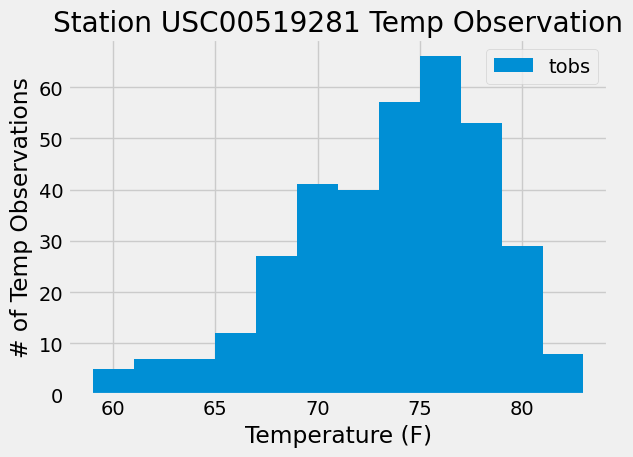

In [48]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
max_temp_tobs = session.query(measurement.station, measurement.tobs)\
    .filter(measurement.date >= '2016-08-23')\
    .filter(measurement.station == 'USC00519281')\
    .all()
max_temp_obs_df = pd.DataFrame(max_temp_tobs)
max_temp_obs_df.head()

max_temp_obs_df.plot.hist(bins=12)
plt.xlabel("Temperature (F)")
plt.ylabel("# of Temp Observations")
plt.title("Station USC00519281 Temp Observation")
plt.tight_layout()
plt.savefig("./histogram of temperature.png")
plt.show()


# Close Session

In [49]:
# Close Session
session.close()